In [1]:
import os
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets

In [17]:
data_path = '/media/gabriel/External 2.0 TB/ImageNet/1000_classes'
classes = next(os.walk(data_path, topdown=True))[1]
classes.sort()

len(classes)

977

In [18]:
alexnet = models.alexnet(pretrained=True)
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [19]:
imagenet_data = datasets.ImageFolder(
        data_path, 
        transform=transforms.Compose([
            transforms.RandomCrop(224),
            transforms.ToTensor()
        ]))
data_loader = DataLoader(
        imagenet_data, batch_size=5,
        shuffle=True, num_workers=4)

data_loader_iter = iter(data_loader)

In [20]:
images, labels = next(data_loader_iter)
image = images[0].numpy().transpose(1,2,0)
label = labels[0].item()

print(images.shape)
print(labels.shape)

torch.Size([5, 3, 224, 224])
torch.Size([5])


crayfish


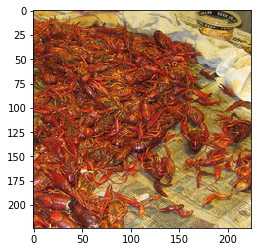

In [21]:
print(classes[label] + ' %s' +  )
plt.imshow(image)
plt.show()

In [22]:
conv_1 = alexnet.features[0:3]
conv_2 = alexnet.features[3:6]
conv_3 = alexnet.features[6:8]
conv_4 = alexnet.features[8:10]
conv_5 = alexnet.features[10:]

In [ ]:
conv_1[0].weight.shape
# kernel_11 = conv_1[0].weight[0]
# kernel_11 = kernel_11.detach().numpy()
# # kernel_11 = kernel_11.transpose(1, 2, 0)
# kernel_11.shape